### Overfitting: ejemplo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [4]:
#Leer los datos, nombre de los atributos y la clase
datasetInicial=pd.read_csv('diabetes.csv')

In [14]:
atributosName=datasetInicial.columns[:-1]
atributoClase=datasetInicial.columns[-1]
clasesName=datasetInicial[datasetInicial.columns[-1]].drop_duplicates()
print(atributosName)
print(clasesName)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')
0    tested_positive
1    tested_negative
Name: class, dtype: object


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    datasetInicial[atributosName], datasetInicial[atributoClase], stratify=datasetInicial[atributoClase], random_state=66, test_size = 0.2)

training_accuracy = []
test_accuracy = []
training_error = []
test_error = []

n_epoch = range(10, 200, 10)

In [19]:
for epoch in n_epoch:
    # build the model
    clasificador = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(8), 
                    random_state=42,
                    max_iter = epoch)
    clasificador.fit(X_train, y_train)
    # record training set accuracy and error
    training_accuracy.append(clasificador.score(X_train, y_train))
    training_error.append(1.0 - clasificador.score(X_train, y_train))
    # record generalization accuracy and error
    test_accuracy.append(clasificador.score(X_test, y_test))
    test_error.append(1.0 - clasificador.score(X_test, y_test))



C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

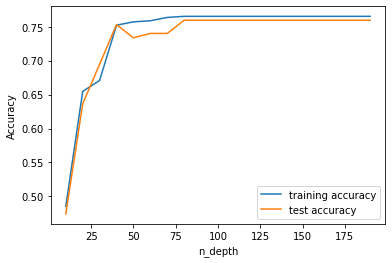

In [20]:
plt.plot(n_epoch, training_accuracy, label="training accuracy")
plt.plot(n_epoch, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

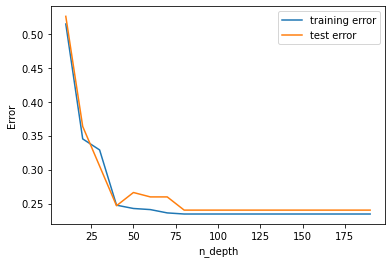

In [21]:
plt.plot(n_epoch, training_error, label="training error")
plt.plot(n_epoch, test_error, label="test error")
plt.ylabel("Error")
plt.xlabel("n_depth")
plt.legend()

In [22]:
clasificador = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(8), 
                    random_state=42)
clasificador.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clasificador.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clasificador.score(X_test, y_test)))

Accuracy on training set: 0.765
Accuracy on test set: 0.760
